- **Nombre:** Juan Sebastian Peñaloza
- **Código:** 1925146
- **Github:** [@jsebastianDS](https://github.com/JsebastianUVPRQ)



# **Parte 1. Transformaciones**
Importamos las librerías necesarias y cargamos la imagen en escala de grises:
numpy y matplotlib sirven para manejar matrices y visualizar imágenes, respectivamente.
se usa openCV para cargar la imagen y convertirla a escala de grises, pero no se usan metodos de la libreria para realizar las transformaciones.

---


In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Histograma de la imagen de gokú calvo
La larga cabellera es un símbolo de sabiduría y poder en muchas culturas, y en el caso de Gokú lo es aún más. 
En esta obra de arte meta-modernista vemos un Gokú reinventado, en una versión que desafía las convenciones estéticas del anime tradicional. 
Su cabello, o más bien lo que queda de él, es un homenaje a la persistencia de la vida en los lugares más inhóspitos, como un jardín que lucha por florecer en un desierto postapocalíptico.
Cada vello emergiendo de su cuero cabelludo es un símbolo de resistencia, un recordatorio de que incluso los guerreros más poderosos no pueden escapar del inexorable paso del tiempo... ni de la genética.

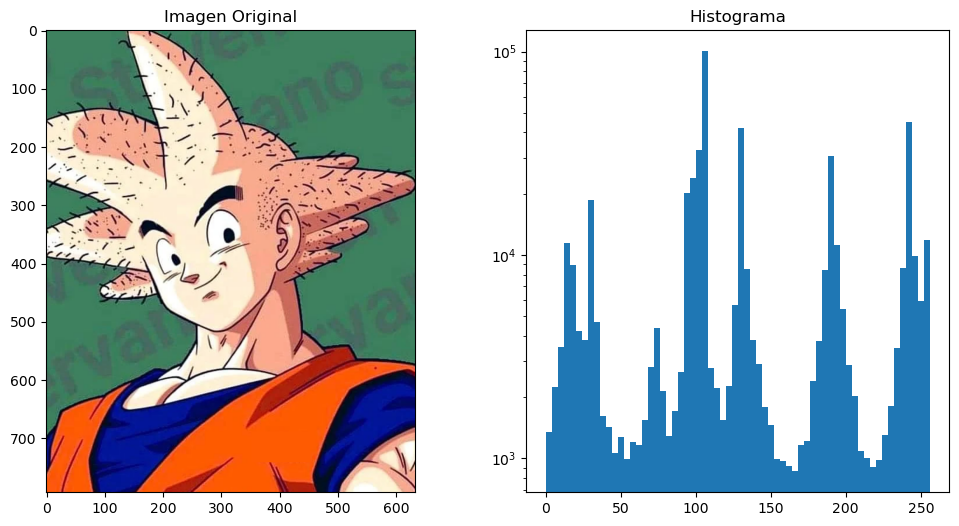

In [16]:
# Cargar imagen y convertir a escala de grises
img = cv2.imread('input.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float32)  
# Uso float32 para evitar problemas con la resta

# Mostrar imagen
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Imagen Original')
plt.subplot(122), plt.hist(gray.ravel(), 64, [0,256], log='True'), plt.title('Histograma')
plt.show()


## La transformacion de suma y resta son evaluadas frecuentemente. Por eso voy a implementar otras transformaciones aritmeticas posibles: brillo y contraste.
---
Para la transformacion de brillo se convierte cada pixel de la imagen a un valor entero de 8 bits, se le suma un valor constante y se vuelve a convertir a un valor de 8 bits.
Esta constante es un numero entero que se le suma a cada pixel de la imagen, si la suma de un pixel con la constante es mayor a 255, se le asigna el valor 255, si es menor a 0, se le asigna el valor 0.

$$ h(m,n) = f(m,n) + B $$

```python
brightness = 50
brightened = np.clip(gray + brightness, 0, 255).astype(np.uint8)
```


c:\Users\quint.LAPTOP-LGVR2QRN\anaconda3\envs\platzienv\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


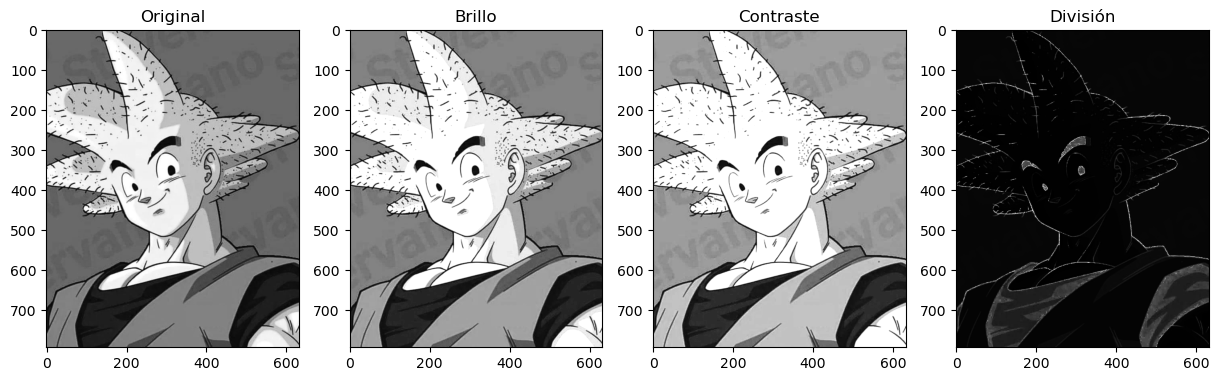

In [17]:
# División (usando una máscara)
mask = np.ones_like(gray) * 1000  

brightness = 50
contrast = 1.5

# Brillo
brightened = np.clip(gray + brightness, 0, 255).astype(np.uint8)

# Contraste
contrasted = np.clip(gray * contrast, 0, 255).astype(np.uint8)

# División (ejemplo adicional)
divided = np.clip(mask / gray, 0, 255).astype(np.uint8)

plt.figure(figsize=(15,5))
plt.subplot(141), plt.imshow(gray, cmap='gray'), plt.title('Original')
plt.subplot(142), plt.imshow(brightened, cmap='gray'), plt.title('Brillo')
plt.subplot(143), plt.imshow(contrasted, cmap='gray'), plt.title('Contraste')
plt.subplot(144), plt.imshow(divided, cmap='gray'), plt.title('División')
plt.show()


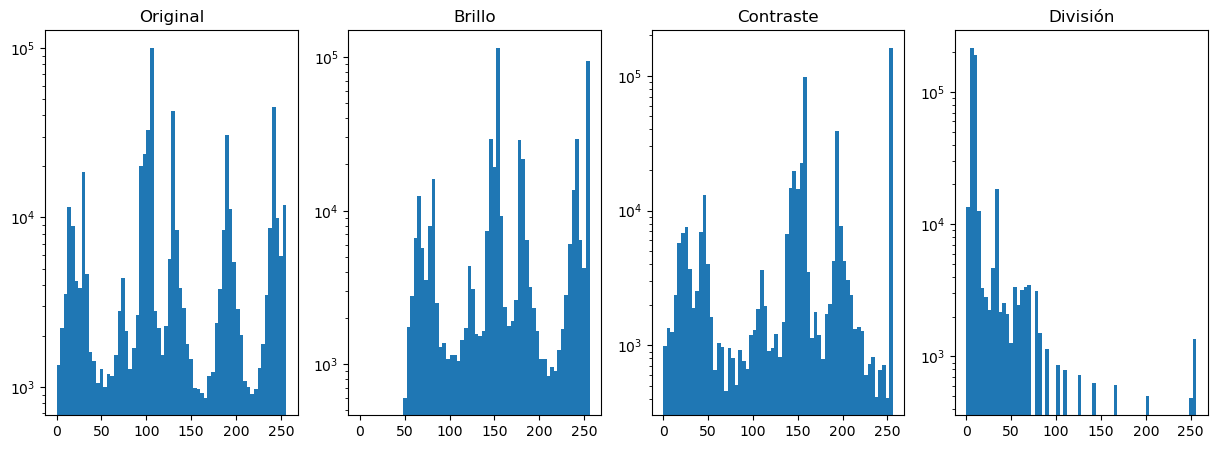

In [18]:
# Histogramas de las operaciones
plt.figure(figsize=(15,5))
plt.subplot(141), plt.hist(gray.ravel(), 64, [0,256], log='True'), plt.title('Original')
plt.subplot(142), plt.hist(brightened.ravel(), 64, [0,256], log='True'), plt.title('Brillo')
plt.subplot(143), plt.hist(contrasted.ravel(), 64, [0,256], log='True'), plt.title('Contraste')
plt.subplot(144), plt.hist(divided.ravel(), 64, [0,256], log='True'), plt.title('División')
plt.show()

## Negativo de una imagen
El negativo de una imagen se obtiene restando el valor de cada pixel a 255, es decir, si un pixel tiene un valor de 100, en el negativo tendra un valor de 155.
$$ h(m,n) = 255 - f(m,n) $$
$$ T(i) = 255 - i $$


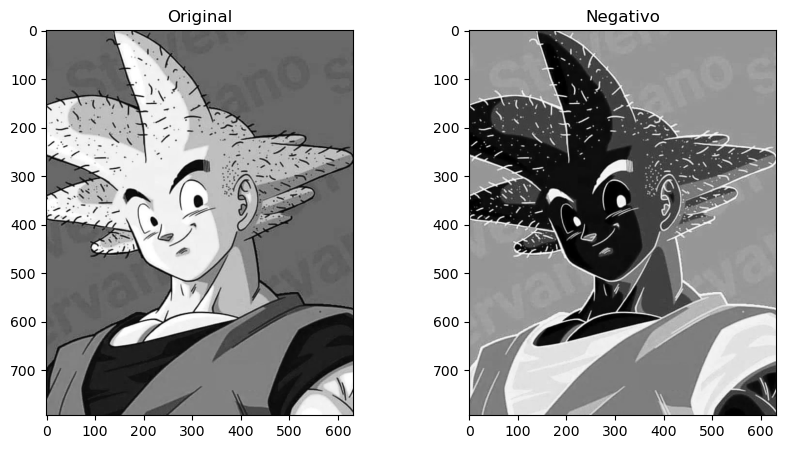

In [19]:
# Imagen Negativa
negative = 255 - gray
negative = np.clip(negative, 0, 255).astype(np.uint8)

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(gray, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(negative, cmap='gray'), plt.title('Negativo')
plt.show()


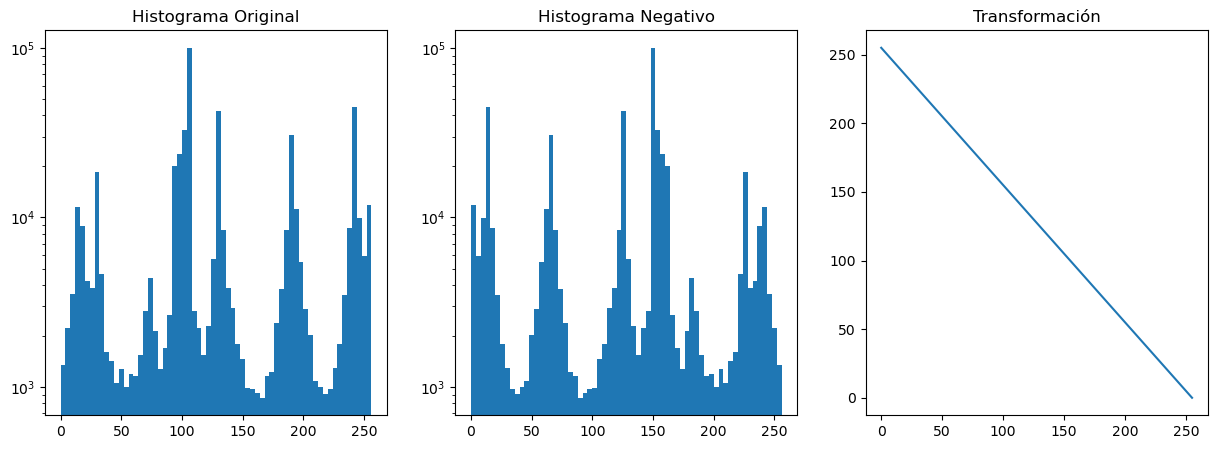

In [20]:
# histograma y grafica de la transformacion
plt.figure(figsize=(15,5))
plt.subplot(131), plt.hist(gray.ravel(), 64, [0,256], density=False, histtype='bar', log='True'), plt.title('Histograma Original')
plt.subplot(132), plt.hist(negative.ravel(), 64, [0,256], density=False, histtype='bar', log='True'), plt.title('Histograma Negativo')
plt.subplot(133), plt.plot(np.arange(256), np.arange(256)[::-1]), plt.title('Transformación')
plt.show()


## Corrección Gamma
La corrección gamma es una transformación no lineal que se aplica a las imágenes digitales para corregir la luminancia de la imagen.

$$ h(m,n) = f(m,n)^\gamma $$


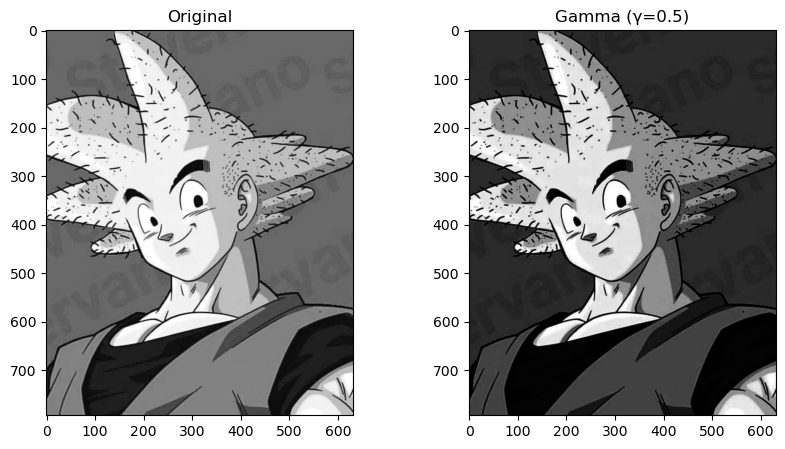

In [21]:
# Funcion para la transformacion
def gamma_correction(image, gamma=1.0):
    inv_gamma = 1.0 / gamma
    return (image / 255.0)**inv_gamma * 255.0

gamma = 0.5
gamma_corrected = gamma_correction(gray, gamma).astype(np.uint8)

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(gray, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(gamma_corrected, cmap='gray'), plt.title('Gamma (γ=0.5)')
plt.show()



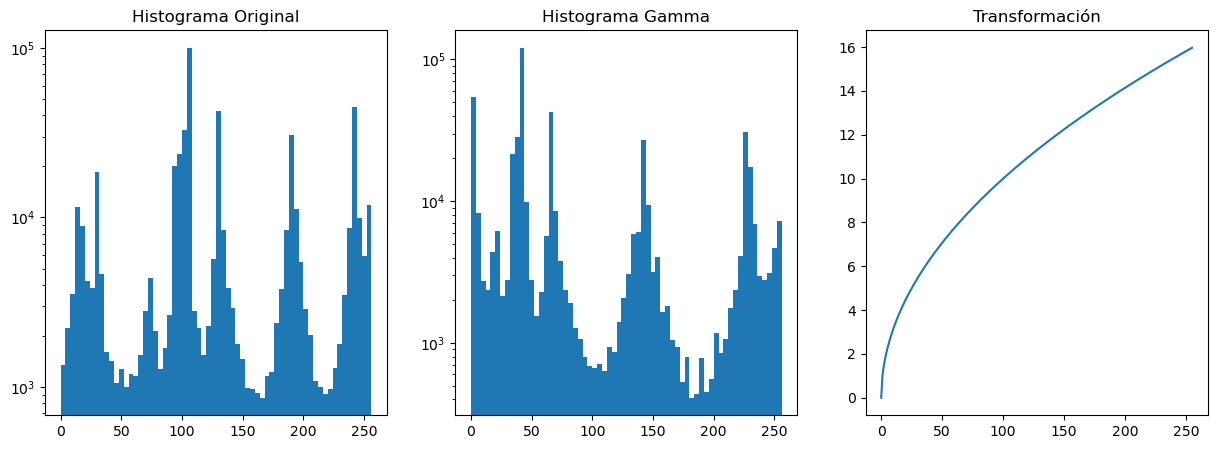

In [22]:
# histograma y grafica de la transformacion
plt.figure(figsize=(15,5))
plt.subplot(131), plt.hist(gray.ravel(), 64, [0,256], density=False, histtype='bar', log='True'), plt.title('Histograma Original')
plt.subplot(132), plt.hist(gamma_corrected.ravel(), 64, [0,256], density=False, histtype='bar', log='True'), plt.title('Histograma Gamma')
plt.subplot(133), plt.plot(np.arange(256), np.arange(256)**gamma), plt.title('Transformación')
plt.show()


## Estiramiento de Histograma
Esta transformación se realiza para mejorar el contraste de una imagen. Se calcula el valor mínimo y máximo de la imagen y se aplica la siguiente transformación:

$$ H(i) = \dfrac{i - i_{min}}{i_{max} - i_{min}} $$


La grafica de transformación esperada es una forma de $S$ recta, donde los valores bajos de la imagen se expanden y los valores altos se comprimen.

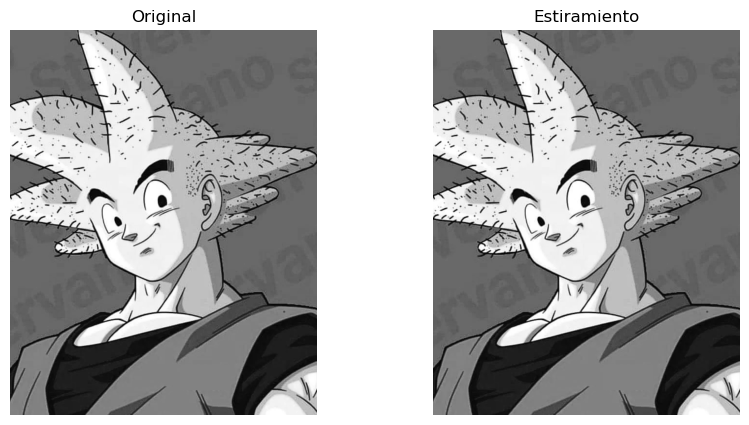

In [23]:
min_val = gray.min()
max_val = gray.max()

# Evitar divisiones por cero
if max_val > min_val:
    stretched = ((gray - min_val) * (255.0 / (max_val - min_val)))
else:
    stretched = np.zeros_like(gray)  # Si max == min, toda la imagen será negra

# Convertir de nuevo a uint8 para visualización correcta
stretched = stretched.astype(np.uint8)

# Mostrar las imágenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(stretched, cmap='gray')
plt.title('Estiramiento')
plt.axis('off')
plt.show()


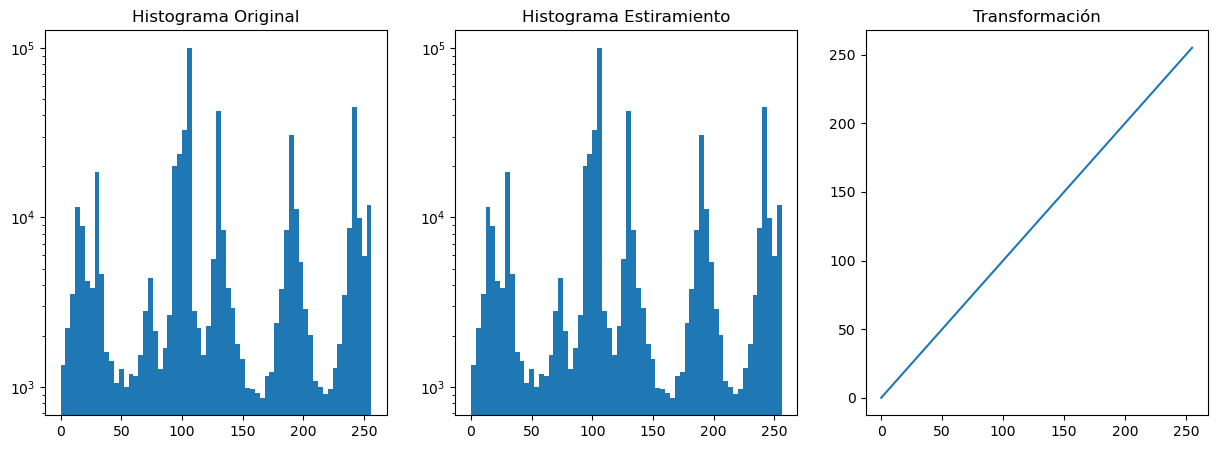

In [24]:
# Histograma y grafica de la transformacion para el estiramiento
plt.figure(figsize=(15,5))
plt.subplot(131), plt.hist(gray.ravel(), 64, [0,256], density=False, histtype='bar', log='True'), plt.title('Histograma Original')
plt.subplot(132), plt.hist(stretched.ravel(), 64, [0,256], density=False, histtype='bar', log='True'), plt.title('Histograma Estiramiento')
plt.subplot(133), plt.plot(np.arange(256), np.arange(256)), plt.title('Transformación')
plt.show()

## Igualación de Histograma
La igualación de histograma es una transformación que se realiza para mejorar el contraste de una imagen. Se calcula la función de distribución acumulada de la imagen y se aplica la siguiente transformación:
$$ h(m,n) = T(r_k) $$
donde $ T(r) = (L-1) * S(r) $


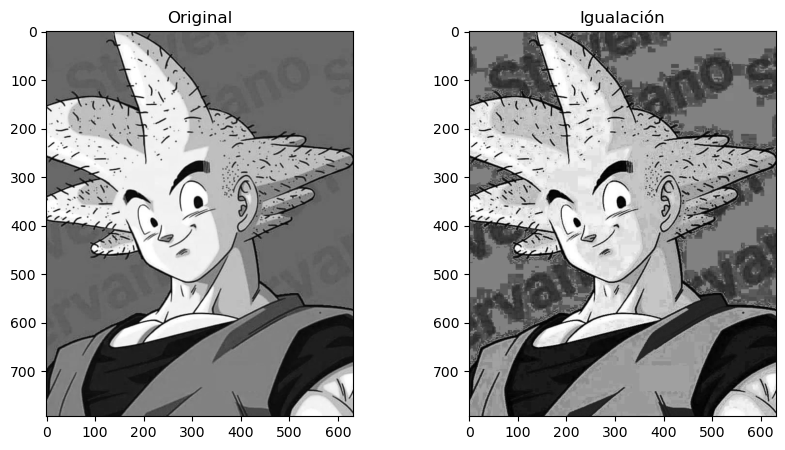

In [25]:

equalized = cv2.equalizeHist(gray.astype(np.uint8))

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(gray, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(equalized, cmap='gray'), plt.title('Igualación')
plt.show()


## Umbralización
La umbralización es una transformación que se realiza para segmentar una imagen en dos regiones. Se define un umbral $T$ y se aplica la siguiente transformación:
$$ h(m,n) = { 0 si f(m,n) < T; 255 si f(m,n) >= T } $$


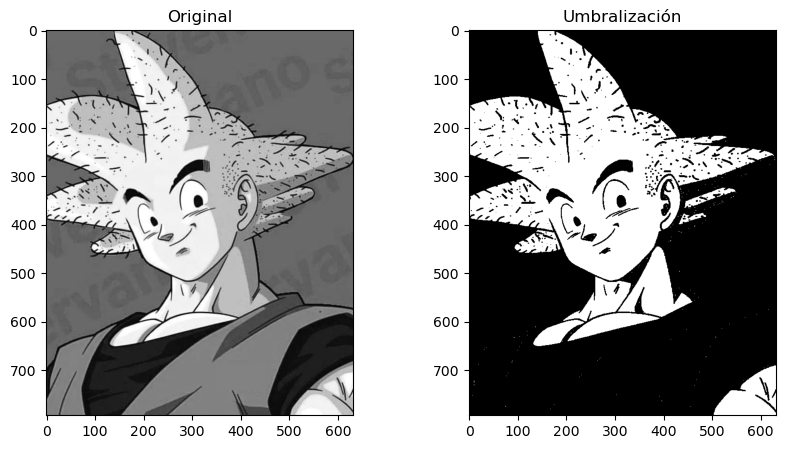

In [26]:

_, thresh = cv2.threshold(gray.astype(np.uint8), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(gray, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(thresh, cmap='gray'), plt.title('Umbralización')
plt.show()


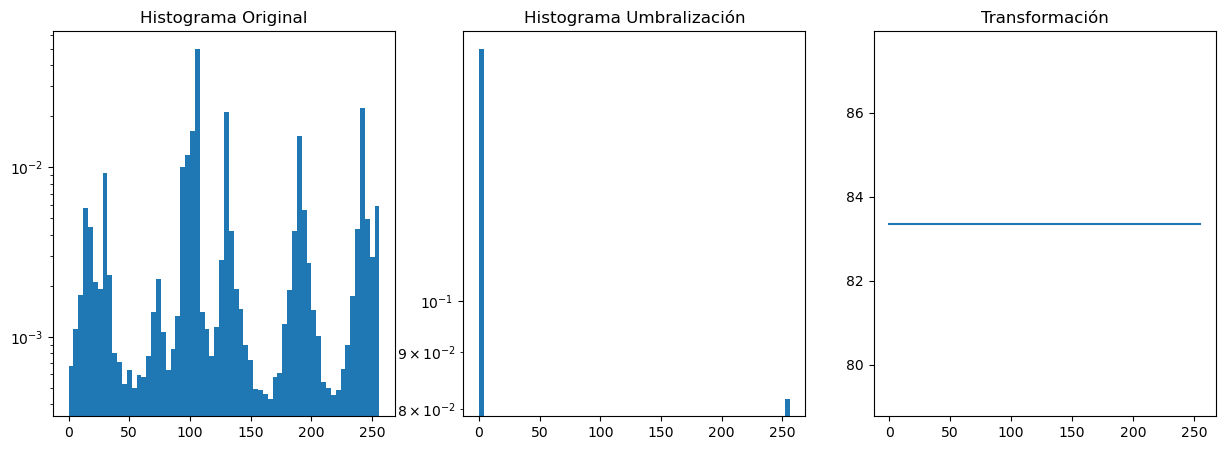

In [27]:
# Histograma y grafica de la transformacion para la umbralización
plt.figure(figsize=(15,5))
plt.subplot(131), plt.hist(gray.ravel(), 64, [0,256], density=True, histtype='bar', log=True), plt.title('Histograma Original')
plt.subplot(132), plt.hist(thresh.ravel(), 64, [0,256], density=True, histtype='bar', log=True), plt.title('Histograma Umbralización')

# Plotting the transformation
plt.subplot(133), plt.plot(np.arange(256), np.ones(256) * np.mean(thresh)), plt.title('Transformación')
plt.show()


# Parte 2. Convolución
La convolución es una operación matemática que se realiza entre dos funciones para obtener una tercera función. En el procesamiento de imágenes, la convolución se realiza entre una imagen y un kernel para obtener una imagen filtrada.

### Kernel de suavizado color
---

Para aplicar un filtro de suavizado a una imagen en color, a diferencia de la escala de grises, se debe aplicar el filtro a cada canal de color por separado. El kernel de suavizado Box Blur, según el temario, es el siguiente:
$$ K = \dfrac{1}{9} \begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix} $$

Lo que haré es aplicar este kernel a cada canal de color de la imagen y luego combinar los resultados para obtener la imagen suavizada en color. En lugar de usar bucles anidados para multiplicar cada elemento del kernel por el valor de píxel correspondiente, extraigo la región de interés (ROI) de la imagen suavizada-blurreada que corresponde al píxel actual y sus vecinos. Luego realizo la multiplicación elemento a elemento entre la ROI y el kernel, seguido de una suma de todos los elementos. Se implementa con `np.sum(roi * kernel[:, :, np.newaxis], axis=(0, 1))`, que es mucho más rápido que los bucles explícitos.



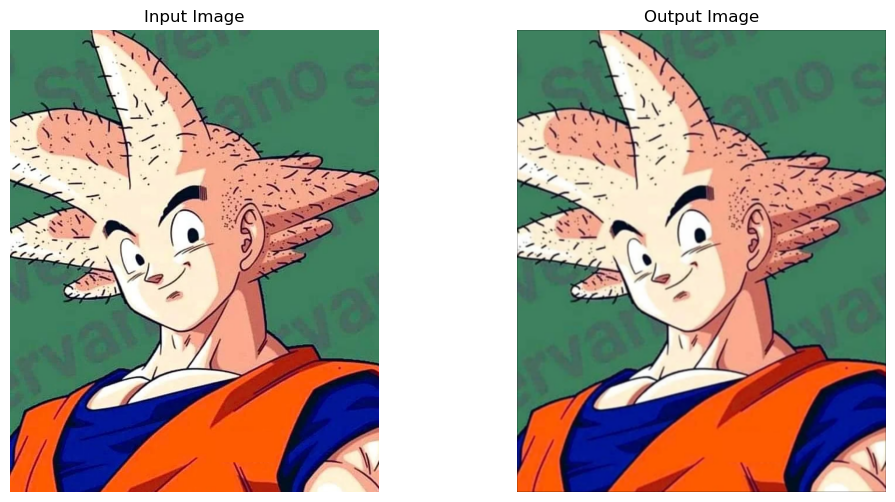

In [28]:
input_image = cv2.imread('input.jpg')

# Pasar de BGR a RGB
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB).astype(np.float32)

def apply_kernel_optimized(image, kernel):
    # Obtener las dimensiones de la imagen y el kernel
    image_height, image_width, channels = image.shape
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    # Con el fin de evitar problemas de borde, se puede hacer padding a la imagen
    # Es decir, agregar pixeles alrededor del borde
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width), (0, 0)), mode='constant', constant_values=0)
    
    # imagen vacia
    output_image = np.zeros_like(image, dtype=np.float32)
    
    # Iterate over each row and column of the input image
    for y in range(image_height):
        for x in range(image_width):
            # Extraer ña ROI
            roi = padded_image[y:y+kernel_height, x:x+kernel_width]
            
            # Hacer la multiplicación de la ROI con el kernel y sumar los resultados
            accumulator = np.sum(roi * kernel[:, :, np.newaxis], axis=(0, 1))
            output_image[y, x] = accumulator
    
    return output_image

# Definicion del kernel de suavizado
kernel = np.array([[1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9]], dtype=np.float32)


output_image = apply_kernel_optimized(input_image_rgb, kernel)

# Normalize the output image to the range [0, 255]
output_image = np.clip(output_image, 0, 255).astype(np.uint8)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(input_image_rgb.astype(np.uint8))
plt.title('Input Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title('Output Image')
plt.axis('off')

plt.show()